# Distributions
### Exploratory Data Analysis in Python
####  Career track : Data Analyts with Python 
##### DataCamp - 2020
##### Karen Jimenez


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
from scipy.stats import norm

#Read the dataset
gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


## Make PMF
`empiricaldist` provides `Pmf`, which is a Pandas Series that represents a probability mass function.


In [2]:
# Compute the PMF for year
year = gss['year']
pmf_year = Pmf.from_seq(year, normalize = False)
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: year, dtype: int64


## Plot PMF

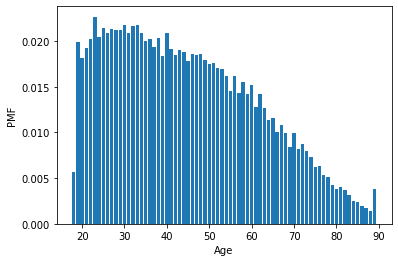

In [3]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

# CDF Cumulative Distribution funtions

In [4]:
# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age(30))

0.2539137136526389


In [5]:
# Select realinc
income = gss['realinc']

cdf_income = Cdf.from_seq(income)

# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Compute IQR
# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


# Plot CDF

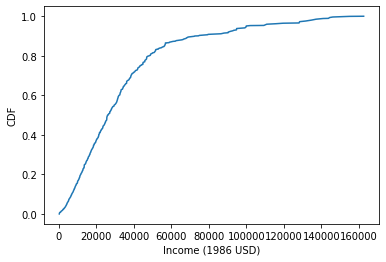

In [6]:
# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

# Comparing Distributions (Extract education levels)

In [11]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = ((educ >= 14) & (educ < 16))

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


## Plot income CDFs

People with more education have higher incomes

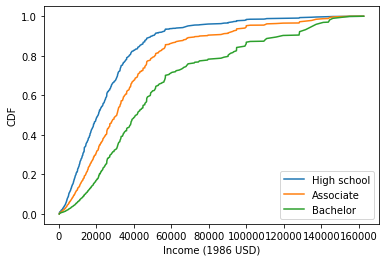

In [12]:
income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

## Modeling distributions

In [14]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


#### Comparing CDFs

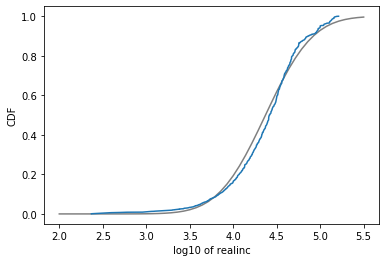

In [16]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
plt.plot(Cdf.from_seq(log_income))
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

#### Comparing CDFs

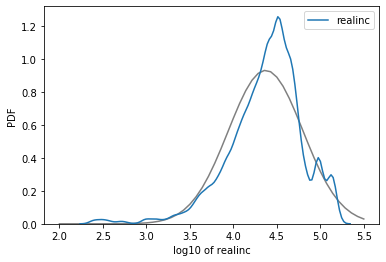

In [19]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE Kernel Density Estimation
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()